In [161]:
import pandas as pd
import numpy as np
from collections import defaultdict


counts_by_interaction = []

def compute(project: str):

    count_by_interaction_type = {'additive': 0, 'competing': 0, 'xor': 0}

    for interaction_type in count_by_interaction_type.keys():
        df = pd.read_csv(f'../analyzed_interactions/{project}/{interaction_type}.csv')

        string_interactions = set(df[df['string_interaction_evidence'].notna()]['interaction'].values)
        biogrid_interactions = set(df[df['biogrid_interaction_evidence'] > 0]['interaction'].values)
        total = string_interactions.union(biogrid_interactions)

        count_by_interaction_type[interaction_type] = len(total)


    counts_by_interaction.append(count_by_interaction_type)

    print(f"{project}, {count_by_interaction_type}, total:{sum(count_by_interaction_type.values())}")
    


DATASETS = [
    "METABRIC",
    "BLCA",
    'BRCA',
    "CESC",
    "COAD",
    "GBM",
    "HNSC",
    "KIRC",
    "KIRP",
    "LAML",
    "LGG",
    "LIHC",
    "LUAD",
    "LUSC",
    "OV",
    "PRAD",
    "READ",
    "SKCM",
    "STAD",
    "THCA",
    "UCEC",
]

for project in DATASETS:
    compute(project)

METABRIC, {'additive': 11, 'competing': 18, 'xor': 14}, total:43
BLCA, {'additive': 5, 'competing': 15, 'xor': 11}, total:31
BRCA, {'additive': 8, 'competing': 16, 'xor': 10}, total:34
CESC, {'additive': 10, 'competing': 18, 'xor': 15}, total:43
COAD, {'additive': 10, 'competing': 18, 'xor': 6}, total:34
GBM, {'additive': 7, 'competing': 9, 'xor': 7}, total:23
HNSC, {'additive': 7, 'competing': 34, 'xor': 16}, total:57
KIRC, {'additive': 6, 'competing': 35, 'xor': 16}, total:57
KIRP, {'additive': 15, 'competing': 16, 'xor': 11}, total:42
LAML, {'additive': 12, 'competing': 14, 'xor': 12}, total:38
LGG, {'additive': 8, 'competing': 18, 'xor': 7}, total:33
LIHC, {'additive': 9, 'competing': 2, 'xor': 8}, total:19
LUAD, {'additive': 7, 'competing': 12, 'xor': 10}, total:29
LUSC, {'additive': 15, 'competing': 13, 'xor': 11}, total:39
OV, {'additive': 7, 'competing': 13, 'xor': 19}, total:39
PRAD, {'additive': 7, 'competing': 11, 'xor': 11}, total:29
READ, {'additive': 11, 'competing': 11, 

In [162]:
from collections import defaultdict
import gzip

l1000_genes = []
string_ids = []

with open('../data/L1000_to_STRING.txt', 'r') as file:
    for line in file:
        gene, string_id = line.rstrip().split('\t')
        l1000_genes.append(gene)
        string_ids.append(string_id)


string_interactions = {}

with gzip.open('../data/9606.protein.links.detailed.v11.5.txt.gz', 'rt') as f:
    # header
    f.readline()
    
    # for fast search
    _string_ids = set(string_ids)

    for line in f:
        columns = line.strip().split(' ')
        if columns[0] in _string_ids and columns[1] in _string_ids:
            string_interactions[(columns[0], columns[1])] = float(columns[-1])

gene_to_stringId = dict(zip(l1000_genes, string_ids))


biogrid_interactions = defaultdict(int)
with open('../data/BIOGRID-ORGANISM-Homo_sapiens-4.4.221.tab', 'r') as f:
    # header
    f.readline()

    g1, g2 = 7, 8
    for line in f:
        line = line.split('\t')
        biogrid_interactions[(line[g1], line[g2])] += 1

In [163]:
import random
import pandas as pd

random_interactions_dist = []

for i in range(10_000):
    random_interactions = []
    
    for _ in range(100):
        gene1, gene2 = random.sample(l1000_genes, 2)

        stringId1 = gene_to_stringId[gene1]
        stringId2 = gene_to_stringId[gene2]

        string_interaction_evidence = string_interactions.get((stringId1, stringId2), None)
        biogrid_interaction_evidence = biogrid_interactions.get((gene1, gene2), 0) + biogrid_interactions.get((gene2, gene1), 0)

        random_interactions.append((f'{gene1}*{gene2}',string_interaction_evidence,biogrid_interaction_evidence))

    df = pd.DataFrame(random_interactions, columns=['interaction', 'string_interaction_evidence', 'biogrid_interaction_evidence'])
    df_string_interactions = set(df[df['string_interaction_evidence'].notna()]['interaction'].values)
    df_biogrid_interactions = set(df[df['biogrid_interaction_evidence'] > 0]['interaction'].values)


    # print(len(set(df_string_interactions)) , len((df_biogrid_interactions)))

    total = df_string_interactions.union(df_biogrid_interactions)
    random_interactions_dist.append(len(total))


    # df.to_csv(f'../data/interactions_literature/RANDOMS/random_{i}.csv', index=False)

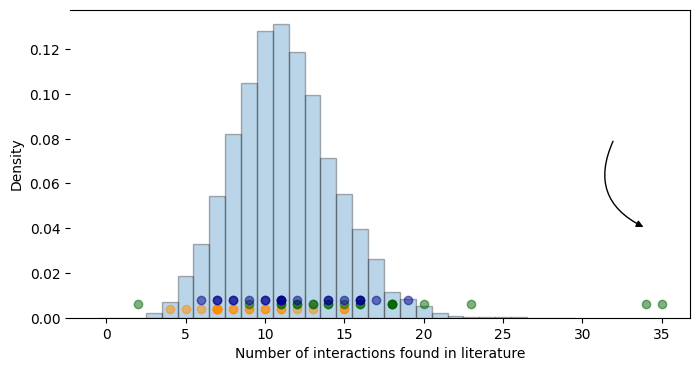

In [218]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# to_plot = pd.Series(random_interactions_dist)
# to_plot.hist(bins=30, density=True, alpha = 0.5, edgecolor = 'black')
# to_plot.plot(kind='kde')
# # plt.hist(random_interactions_dist, density=True, alpha = 0.5, edgecolor = 'black', bins = 30);


# x_range = np.linspace(np.min(random_interactions_dist), np.max(random_interactions_dist), 100)
# x_fill_range = np.linspace(np.percentile(random_interactions_dist, 5), np.percentile(random_interactions_dist, 95), 100)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 4))
ax.spines["left"].set_visible(False)

# for spine in ax.spines.values():
#     spine.set_zorder(0)


ax.hist(random_interactions_dist, density=True, alpha=0.3, edgecolor = 'black', bins = 30, range=(-0.5, 29.5), zorder=1);
# density = stats.gaussian_kde(random_interactions_dist)
# ax.plot(x_range, density(x_range), alpha=0.7)
# ax.fill_between(x_fill_range, density(x_fill_range), alpha=0.2)

additive_dist = [dataset['additive'] for dataset in counts_by_interaction]
# ax.hist(additive_dist, density=True, alpha=0.8, edgecolor = 'black', bins = 10, zorder=1);
competing_dist = [dataset['competing'] for dataset in counts_by_interaction]
# ax.hist(competing_dist, density=True, alpha=0.8, edgecolor = 'black', bins = 10, zorder=1);
xor_dist = [dataset['xor'] for dataset in counts_by_interaction]
# ax.hist(xor_dist, density=True, alpha=0.3, edgecolor = 'black', bins = 30, range=(-0.5, 29.5), zorder=1);

# for x in additive_dist:
#     ax.annotate('', (x, 0), xytext=(0, 10), textcoords='offset points',
#                 arrowprops=dict(arrowstyle="->", lw=1.5))
    
ax.scatter(additive_dist, [0.004]*len(additive_dist), color='darkorange', zorder=2, alpha=0.5)
ax.scatter(competing_dist, [0.006]*len(competing_dist), color='darkgreen', zorder=2, alpha=0.5)
ax.scatter(xor_dist, [0.008]*len(xor_dist), color='darkblue', zorder=2, alpha=0.5)





ax.axhline(0, color='black', linewidth=0.5, zorder=0)

# ax.vlines(35, 0, 0.01, colors='darkorange', linestyles='dashed', label='KIRP')
# ax.vlines(34, 0, 0.01, colors='darkgreen', linestyles='dashed', label='HNSC')
# ax.vlines(23, 0, 0.01, colors='darkblue', linestyles='dashed', label='THCA')
# ax.vlines(18, 0, 0.01, colors='darkred', linestyles='dashed', label='METABRIC')
# ax.vlines(9, 0, 0.01, colors='#654321', linestyles='dashed', label='GBM')
# ax.vlines(2, 0, 0.01, colors='darkcyan', linestyles='dashed', label='LIHC')


# # Add text annotations
# ax.text(35 + 0.5, 0.01, 'KIRP', ha='center', va='bottom', color='darkorange')
# ax.text(34, 0.01, 'HNSC', ha='right', va='bottom', color='darkgreen')
# ax.text(23, 0.01, 'THCA', ha='center', va='bottom', color='darkblue')
# ax.text(18, 0.01, 'METABRIC', ha='center', va='bottom', color='darkred')
# ax.text(9, 0.01, 'GBM', ha='center', va='bottom', color='#654321')
# ax.text(2, 0.01, 'LIHC', ha='center', va='bottom', color='darkcyan')
from matplotlib.patches import FancyArrowPatch

# your existing code here...

# Add a curved arrow pointing to the text HNSC
arrow = FancyArrowPatch((32, 0.08), (34, 0.04), arrowstyle="-|>", mutation_scale=10, 
                        connectionstyle="arc3,rad=.5", color='black')
ax.add_patch(arrow)
ax.set_ylim(bottom=0)

plt.xlabel('Number of interactions found in literature')
plt.ylabel('Density')
plt.show()